In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [46]:
img=cv2.imread("images.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
orignal_shape=img.shape
print(img.shape)

(194, 259, 3)


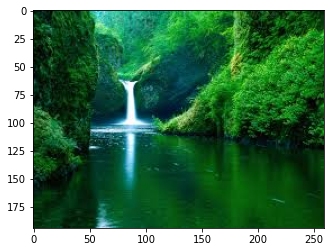

In [47]:
plt.imshow(img)
plt.show()

In [48]:
all_pixal=img.reshape((-1,3))
print(all_pixal.shape)

(50246, 3)


In [49]:
from sklearn.cluster import KMeans

In [50]:
main_color=4

km=KMeans(n_clusters=main_color)
km.fit(all_pixal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
center=km.cluster_centers_
centers=np.array(center,dtype="uint8")
print(centers)

[[  4  43  15]
 [ 46 152  79]
 [145 213 204]
 [ 11  87  32]]


# plot all color

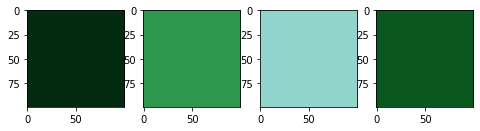

In [52]:
i=1
colors=[]
plt.figure(0,figsize=(8,2))

for col in centers:
    plt.subplot(1,4,i)
    #plt.axis("off")
    i+=1
    
    colors.append(col)
    
    a=np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]=col
    plt.imshow(a)
    
plt.show()

# segmenting original image

In [53]:
new_img=np.zeros((194*259,3),dtype="uint8")
print(new_img.shape)

(50246, 3)


In [54]:
colors

[array([ 4, 43, 15], dtype=uint8),
 array([ 46, 152,  79], dtype=uint8),
 array([145, 213, 204], dtype=uint8),
 array([11, 87, 32], dtype=uint8)]

In [55]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

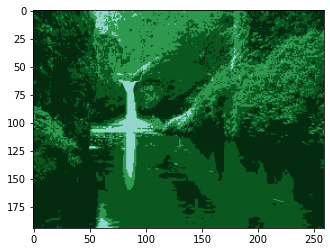

In [56]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[km.labels_[i]]
    
new_img=new_img.reshape((orignal_shape))
plt.imshow(img)
plt.imshow(new_img)
plt.show()